In [1]:
import gzip
import pickle
from tensorflow import keras
import numpy as np

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

# Loading data

In [17]:
path = 'flatland_train.data'
X,y = pickle.load(gzip.open(path,'rb')) #(1000,50,50)

# data pre-proc
y[y != 0] -= 2
X = X / 255.

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42) 

# DNN

In [3]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(50,50))) #(1000,2500)
model.add(keras.layers.Dense(20,activation='relu')) 
model.add(keras.layers.Dense(5,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
             metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 20)                50020     
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
Total params: 50,125
Trainable params: 50,125
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(X,y, epochs=10)

Epoch 1/10
313/313 [==============================] - 3s 4ms/step - loss: 1.4677 - accuracy: 0.4067
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 1.3009 - accuracy: 0.4748
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 1.2225 - accuracy: 0.4936
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 1.1797 - accuracy: 0.5008
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 1.1474 - accuracy: 0.5172
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 1.1237 - accuracy: 0.5223
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 1.1052 - accuracy: 0.5309
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 1.0837 - accuracy: 0.5404
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 1.0654 - accuracy: 0.5501
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 1.0466 - accuracy: 0.5626

In [81]:
model.save('model.h5')

## Test your model!!!

In [82]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.8796

# Fashion MNIST

In [7]:
pip install matplotlib

In [8]:
# TASK: Create DNN model (using keras) for fashion MNIST dataset.



# - Plot the data
# - How many classes are there?
# - Train NN classifier using keras
# - Can you make a model that is able to overfit the data?
# - Play with dropout and different architectures

import matplotlib.pyplot as plt

from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [53]:
X_train.shape

(7000, 50, 50)

In [54]:
X_test.shape

(3000, 50, 50)

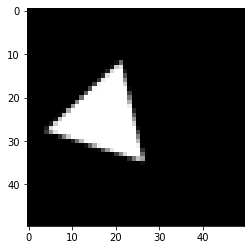

In [43]:

plt.imshow(X_test[0],cmap='gray',vmin=0)

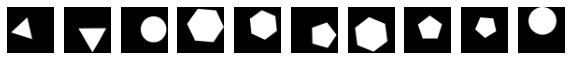

In [40]:
plt.figure(figsize=(10, 10))
for i in range(10):
        plt.subplot(10, 10, 10 + i + 1)
        plt.imshow(X_test[i], cmap='gray')
        plt.axis('off')
plt.show()

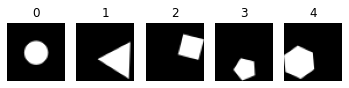

In [47]:
for i in range(5):
    idx= np.where(y_train == i)[0][0]
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[idx],cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show() # padarem po viena skirtinga is kiekvienos klases

In [48]:
#kiek turim klasiu?
from collections import Counter 

Counter(y)

Counter({0.0: 1381, 1.0: 2853, 2.0: 1868, 3.0: 2137, 4.0: 1761})

In [49]:
import numpy as np 

np.unique(y_train,return_counts=True)

(array([0., 1., 2., 3., 4.]), array([ 925, 2005, 1319, 1508, 1243]))

In [55]:
X_train[0] #kad butu gerai, turi buti mazas vidurkis 
#ir standartinis nuokrypis! pasidalinam prad=io datasete is 255

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
#X_train = X_train/255
#X_test = X_test/255
#ARBA su standard scaler
# mean=X_train.mean()
# std = X_train.std()

In [63]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(50,50)))
model.add(keras.layers.Dense(40,activation='relu')) 
model.add(keras.layers.Dense(20,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=0.01),
             metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 2500)              0         
                                                                 
 dense_11 (Dense)            (None, 40)                100040    
                                                                 
 dense_12 (Dense)            (None, 20)                820       
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
Total params: 101,070
Trainable params: 101,070
Non-trainable params: 0
_________________________________________________________________


In [64]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
219/219 [==============================] - 2s 6ms/step - loss: 1.6854 - accuracy: 0.3523 - val_loss: 1.4473 - val_accuracy: 0.4277
Epoch 2/5
219/219 [==============================] - 1s 5ms/step - loss: 1.3712 - accuracy: 0.4556 - val_loss: 1.3207 - val_accuracy: 0.4827
Epoch 3/5
219/219 [==============================] - 1s 5ms/step - loss: 1.2705 - accuracy: 0.4811 - val_loss: 1.3219 - val_accuracy: 0.4797
Epoch 4/5
219/219 [==============================] - 1s 5ms/step - loss: 1.2193 - accuracy: 0.4886 - val_loss: 1.2217 - val_accuracy: 0.4943
Epoch 5/5
219/219 [==============================] - 1s 5ms/step - loss: 1.1873 - accuracy: 0.5007 - val_loss: 1.1870 - val_accuracy: 0.4887


In [65]:
import pandas as pd

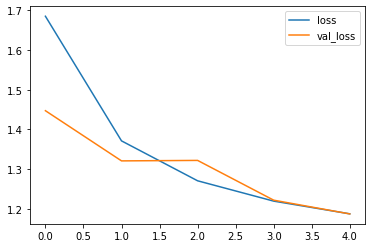

In [66]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

Pakaitaliojam learning rate optimizeryje 

In [ ]:
#X_train = X_train/255
#X_test = X_test/255

In [76]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(50,50)))
model.add(keras.layers.Dense(40,activation='relu')) 
model.add(keras.layers.Dense(20,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             #optimizer='adam', #NAUJAS OPTIMIZERIS, GALI LABAI PADET!!!
             optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 2500)              0         
                                                                 
 dense_25 (Dense)            (None, 40)                100040    
                                                                 
 dense_26 (Dense)            (None, 20)                820       
                                                                 
 dense_27 (Dense)            (None, 10)                210       
                                                                 
Total params: 101,070
Trainable params: 101,070
Non-trainable params: 0
_________________________________________________________________


In [78]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
219/219 [==============================] - 1s 5ms/step - loss: 0.5177 - accuracy: 0.8076 - val_loss: 0.7668 - val_accuracy: 0.6897
Epoch 2/30
219/219 [==============================] - 1s 5ms/step - loss: 0.5014 - accuracy: 0.8117 - val_loss: 0.7303 - val_accuracy: 0.6967
Epoch 3/30
219/219 [==============================] - 1s 5ms/step - loss: 0.4826 - accuracy: 0.8233 - val_loss: 0.7533 - val_accuracy: 0.6947
Epoch 4/30
219/219 [==============================] - 1s 5ms/step - loss: 0.4646 - accuracy: 0.8316 - val_loss: 0.7353 - val_accuracy: 0.7117
Epoch 5/30
219/219 [==============================] - 1s 5ms/step - loss: 0.4536 - accuracy: 0.8336 - val_loss: 0.7156 - val_accuracy: 0.7063
Epoch 6/30
219/219 [==============================] - 1s 6ms/step - loss: 0.4405 - accuracy: 0.8387 - val_loss: 0.7612 - val_accuracy: 0.6737
Epoch 7/30
219/219 [==============================] - 1s 6ms/step - loss: 0.4311 - accuracy: 0.8423 - val_loss: 0.7189 - val_accuracy: 0.7113
Epoch 

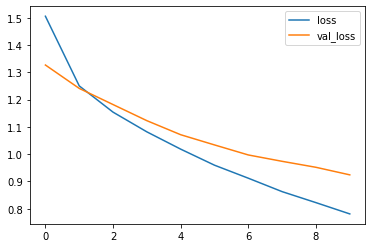

In [69]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

Bandom overfittint

In [79]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(50,50)))
model.add(keras.layers.Dense(256,activation='relu')) 
model.add(keras.layers.Dense(128,activation='relu')) 
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             #optimizer='adam', #NAUJAS OPTIMIZERIS, GALI LABAI PADET!!!
             optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 2500)              0         
                                                                 
 dense_28 (Dense)            (None, 256)               640256    
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 682,058
Trainable params: 682,058
Non-trainable params: 0
_________________________________________________________________


In [80]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 7ms/step - loss: 1.3559 - accuracy: 0.4414 - val_loss: 1.1964 - val_accuracy: 0.4983
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 1.1024 - accuracy: 0.5363 - val_loss: 1.0655 - val_accuracy: 0.5370
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.9224 - accuracy: 0.6237 - val_loss: 0.9152 - val_accuracy: 0.6120
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.7758 - accuracy: 0.6881 - val_loss: 0.8335 - val_accuracy: 0.6457
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.6705 - accuracy: 0.7349 - val_loss: 0.7553 - val_accuracy: 0.6860
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.6038 - accuracy: 0.7603 - val_loss: 0.7538 - val_accuracy: 0.6873
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.5509 - accuracy: 0.7863 - val_loss: 0.7107 - val_accuracy: 0.7147
Epoch 

In [ ]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

# Bandom su dropoutu

In [72]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(256,activation='relu')) 
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(128,activation='relu')) 
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             #optimizer='adam', #NAUJAS OPTIMIZERIS, GALI LABAI PADET!!!
             optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

In [73]:
keras.layers.Dropout?

In [74]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,
                batch_size=156)
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

Epoch 1/50


ValueError: ignored

In [ ]:
inp = keras.layers.Input(input_shape=(28,28))
out = keras.layers.Flatter()(inp)
out = keras.layers.Dense(256,activations='relu')(out)
model.add(keras.layers.Dropout(0,4))(out)
out = keras.layers.Dense(128,activations='relu')(out)
model.add(keras.layers.Dropout(0,4))(out)
out = keras.layers.Dense(64,activations='relu')(out)
model.add(keras.layers.Dropout(0,4))(out)
out = keras.layers.Dense(10,activations='relu')(out)
model.add(keras.layers.Dropout(0,4))(out)
model = keras.models.Model(inputs=inp,outputs=out)
model.summary()